# TMDB 5000 Movie Dataset

<img src="dataset-cover.jpg" width="100%" />

### About Dataset

### Loading Libraries

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',200)

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# dataframe'leri id üzerinden birleştirdik.
df = df1.rename({'movie_id': 'id'}, axis=1)
df = df2.merge(df,on='id')

In [4]:
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
1861,25000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",http://www.thehousebunny.com/,12620,"[{""id"": 2389, ""name"": ""virgin""}, {""id"": 2483, ...",en,The House Bunny,Shelley is living a carefree life until a riva...,25.838073,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-08-22,70442940,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,For the girls of ZETA house college life was n...,The House Bunny,5.6,529,The House Bunny,"[{""cast_id"": 23, ""character"": ""Shelley"", ""cred...","[{""credit_id"": ""52fe45089251416c75049755"", ""de..."
2978,10000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,10890,"[{""id"": 248, ""name"": ""date""}, {""id"": 1595, ""na...",en,Stripes,"John Winger, an indolent sad sack in his 30s, ...",10.892398,"[{""name"": ""Columbia Pictures Industries"", ""id""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1981-06-25,85300000,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The story of a man who wanted to keep the worl...,Stripes,6.5,249,Stripes,"[{""cast_id"": 1, ""character"": ""John Winger"", ""c...","[{""credit_id"": ""52fe43ca9251416c7501e4ed"", ""de..."
1138,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,228967,"[{""id"": 591, ""name"": ""cia""}, {""id"": 6285, ""nam...",en,The Interview,Dave Skylark and his producer Aaron Rapoport r...,74.168016,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-12-25,12342632,112.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,The Film Hackers Tried To Get Banned,The Interview,6.1,2304,The Interview,"[{""cast_id"": 8, ""character"": ""Dave Skylark"", ""...","[{""credit_id"": ""549b987c9251413123002ce9"", ""de..."
3732,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,47452,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 967...",en,Love and Death on Long Island,Giles De'Ath is a widower who doesn't like any...,0.933891,"[{""name"": ""Arts Council of England"", ""id"": 718...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1997-01-01,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Love and Death on Long Island,6.9,11,Love and Death on Long Island,"[{""cast_id"": 1002, ""character"": ""Giles De'Ath""...","[{""credit_id"": ""52fe4734c3a36847f8128ceb"", ""de..."
449,80000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,20504,"[{""id"": 3096, ""name"": ""book""}, {""id"": 4458, ""n...",en,The Book of Eli,"A post-apocalyptic tale, in which a lone man f...",32.363538,"[{""name"": ""Alcon Entertainment"", ""id"": 1088}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-01-14,157107755,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some will kill to have it. He will kill to pro...,The Book of Eli,6.6,2164,The Book of Eli,"[{""cast_id"": 1, ""character"": ""Eli"", ""credit_id...","[{""credit_id"": ""52fe43e9c3a368484e0058ad"", ""de..."


In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

#### 🎩 Popularity Based Recommender System

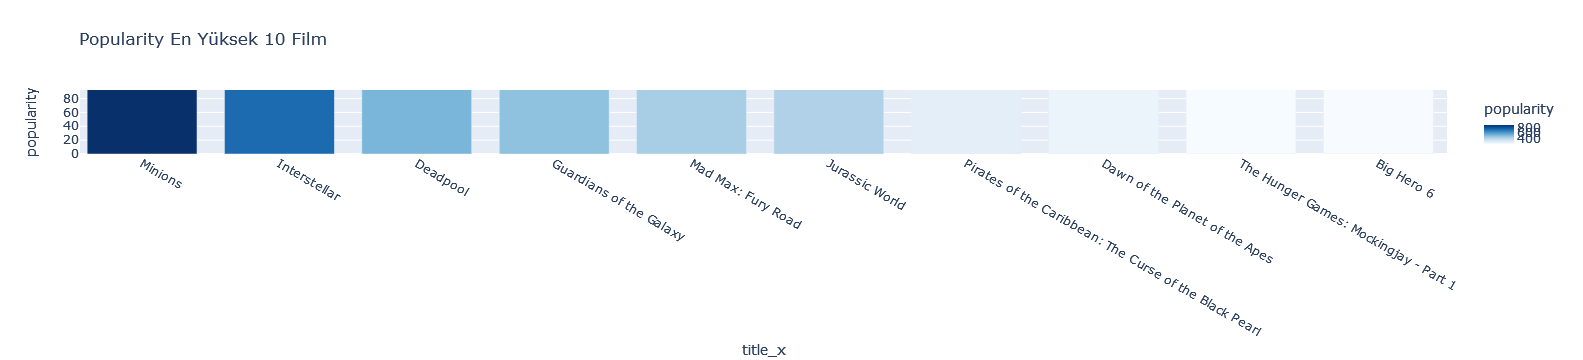

In [8]:
top_pop= df.sort_values('popularity', ascending=False)[:10]

px.bar(data_frame=top_pop,
 x='title_x',
 y='popularity',
 color='popularity',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Popularity En Yüksek 10 Film')

"Filmin ortalama reytinglerini puan olarak kullanabiliriz ama bunu kullanmak yeterince adil olmayacaktır çünkü ortalama reytingi 8,9 olan ve sadece 3 oy alan bir film, ortalama reytingi 7,8 olan ancak 40 oy alan filmden daha iyi kabul edilemez."

https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system
bu çalışma incelenerek öğrenmek amaçlanmıştır.

In [10]:
# Ağırlıklı Oy Ortalaması Hesaplama

C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
w_rating = df.copy().loc[df['vote_count'] >= m]
#fonksiyonu uyguluyoruz.
w_rating['score'] = w_rating.apply(weighted_rating, axis=1)
# en yüksek düşüğe sıralıyoruz.
w_rating = w_rating.sort_values('score', ascending=False)
#top 15 film
w_rating[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


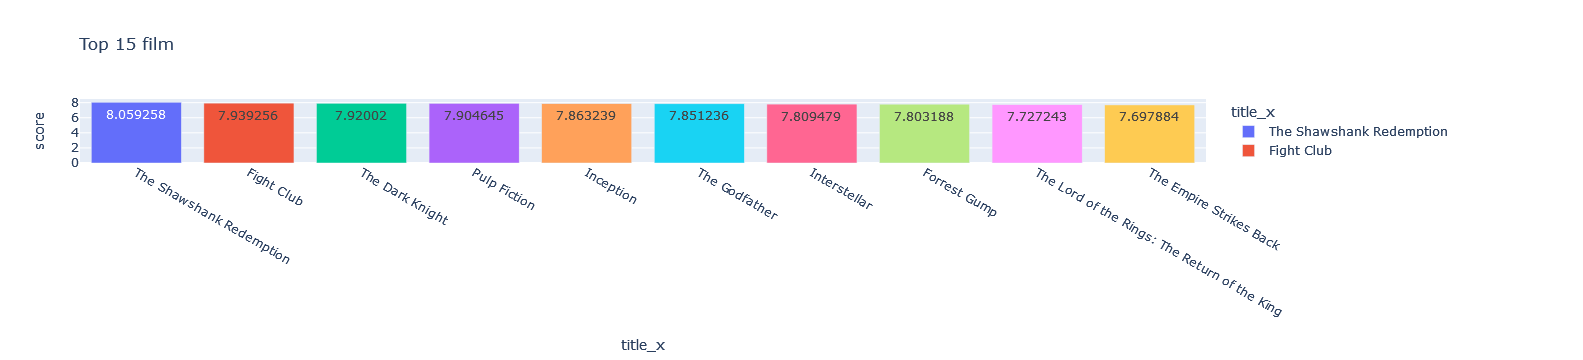

In [24]:
top=w_rating[['title_x','score']].head(10)

px.bar(data_frame=top,
 x='title_x',
 y='score',
 color='title_x',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 15 film')

Kullanıcının eğer daha öncesine ait verisi yoksa popüler film ve aldıkları puanlara göre öneride bulunabilir. Buna göre ilk öneriler;
* En yüksek popularity  olan "Minions" filmi 
* En yüksek puanı olan "The Shawshank Redemption" kullanıcıya öneri olarak sunulabilir.

### 👩‍🚀 Content Based Filtering

In [29]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [36]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(4803, 20978)

In [37]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



In [38]:
indices = pd.Series(df.index, index=df['title_x']).drop_duplicates()


In [41]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title_x'].iloc[movie_indices]

In [43]:
get_recommendations('Minions')

506                           Despicable Me 2
221                           Stuart Little 2
1218                           The Guilt Trip
2511                               Home Alone
3944                                  Freeway
2892                        Darling Companion
505     The League of Extraordinary Gentlemen
3188                          Velvet Goldmine
1733                        The Spy Next Door
70                             Wild Wild West
Name: title_x, dtype: object

### 🎥 Credits, Genres and Keywords Based Recommender

Meta verilere dayalı olarak bir tavsiye oluşturacağız: en iyi 3 oyuncu, yönetmen, ilgili türler ve film konusu anahtar kelimeleri.

In [45]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [63]:
#Yönetmen listelenmemişse, NaN'yi döndür
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [47]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [49]:
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [52]:
df[['title_x', 'cast', 'director', 'keywords', 'genres']].sample(3)

,title_x,cast,director,keywords,genres
4118,Hum To Mohabbat Karega,[],NaN,[],[]
1890,Don Juan DeMarco,"[Johnny Depp, Marlon Brando, Faye Dunaway]",Jeremy Leven,"[sex addiction, love, mental institution]","[Romance, Drama, Comedy]"
544,Flight of the Phoenix,"[Dennis Quaid, Tyrese Gibson, Giovanni Ribisi]",John Moore,"[robbery, water, gobi desert]","[Action, Adventure, Drama]"


In [53]:
#boşluklar çıkarılıp adları ve anahtar kelimeleri alıyoruz.
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [54]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [56]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['soup'] = df.apply(create_soup, axis=1)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

df = df.reset_index()
indices = pd.Series(df.index, index=df['title_x'])

In [61]:
get_recommendations('Avatar', cosine_sim2)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title_x, dtype: object

In [62]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_x, dtype: object